In [23]:
%matplotlib inline
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#READ THE CSV FILE
df = pd.read_csv("WHO-COVID-19-global-data.csv")
df = pd.DataFrame(df)

In [24]:
# GROUP BY COUNTRIES TO EXTRACT OUR CHOSEN COUNTRIES
df_countries = df.groupby(df["Country"])

# OMAN
df_oman = df_countries.get_group("Oman")
df_oman = df_oman.reset_index(drop = True)
df_oman = df_oman['Cumulative_cases']
df_oman = pd.DataFrame(df_oman)

#UAE
df_uae = df_countries.get_group("United Arab Emirates")
df_uae = df_uae.reset_index(drop = True)
df_uae = df_uae['Cumulative_cases']
df_uae = pd.DataFrame(df_uae)

#KUWAIT
df_kwt = df_countries.get_group("Kuwait")
df_kwt = df_kwt.reset_index(drop = True)
df_kwt = df_kwt['Cumulative_cases']
df_kwt = pd.DataFrame(df_kwt)

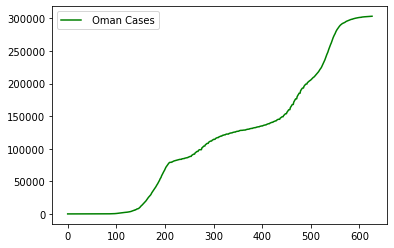

In [29]:
df_oman['Cumulative_cases'].plot(label = ' Oman Cases', color = 'green')
plt.legend()

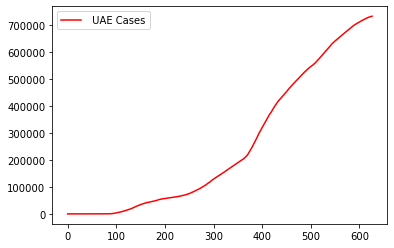

In [30]:
df_uae['Cumulative_cases'].plot(label = ' UAE Cases', color = 'red')
plt.legend()

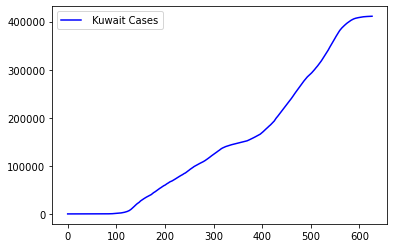

In [31]:
df_kwt['Cumulative_cases'].plot(label = ' Kuwait Cases', color = 'blue')
plt.legend()

In [32]:
#NORMALIZATION (population of each country)
pop_k = 4271000 
pop_o = 5107000
pop_u = 9890000
df_kwt["Cumulative_cases_norm"] = df_kwt["Cumulative_cases"]/pop_k
df_oman["Cumulative_cases_norm"] = df_oman["Cumulative_cases"]/pop_o
df_uae["Cumulative_cases_norm"] = df_uae["Cumulative_cases"]/pop_u

df_kwt

,Cumulative_cases,Cumulative_cases_norm
0,0,0.000000
1,0,0.000000
2,0,0.000000
3,0,0.000000
4,0,0.000000
...,...,...
622,410901,0.096207
623,410959,0.096221
624,411022,0.096236
625,411065,0.096246


In [33]:
df_uae

,Cumulative_cases,Cumulative_cases_norm
0,0,0.000000
1,0,0.000000
2,0,0.000000
3,0,0.000000
4,0,0.000000
...,...,...
622,730743,0.073887
623,731307,0.073944
624,731828,0.073997
625,732299,0.074044


In [34]:
df_oman

,Cumulative_cases,Cumulative_cases_norm
0,0,0.000000
1,0,0.000000
2,0,0.000000
3,0,0.000000
4,0,0.000000
...,...,...
622,303268,0.059383
623,303309,0.059391
624,303309,0.059391
625,303309,0.059391


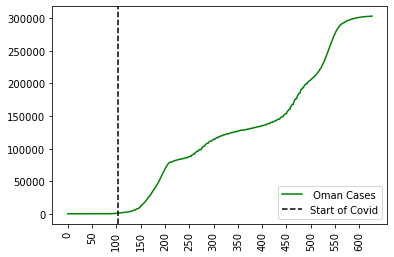

In [36]:
#Labelling 100 cases as the official start of pandemic

x = [0,14,27,40,53,66,79,92,105,118,131,144,157,170,183,196,209,222,235,248,261
     ,274,287,300,313,326,339,352,365,378,391,404,417,430,443,456,469,482,495,
     508,521,534,547,560,573,586,599,612,625]

#the pandemic in Oman officially began on the 103rd day
threshold = 103
df_oman['Cumulative_cases'].plot(label = ' Oman Cases', color = 'green')
plt.axvline(x = threshold, color = 'black', linestyle = '--', label = 'Start of Covid')
plt.legend()
plt.xticks(np.arange(min(x), max(x)+1, 50))
plt.xticks(rotation=90)
plt.show()

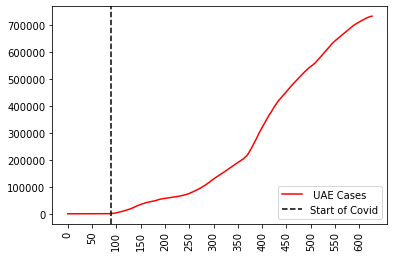

In [37]:
#the pandemic in UAE officially began on the 90th day
threshold = 90
df_uae['Cumulative_cases'].plot(label = ' UAE Cases', color = 'red')
plt.axvline(x = threshold, color = 'black', linestyle = '--', label = 'Start of Covid')
plt.legend()
plt.xticks(np.arange(min(x), max(x)+1, 50))
plt.xticks(rotation=90)
plt.show()

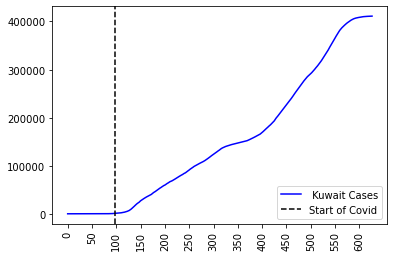

In [38]:
#the pandemic in Kuwait officially began on the 97th day
threshold = 97
df_kwt['Cumulative_cases'].plot(label = ' Kuwait Cases', color = 'blue')
plt.axvline(x = threshold, color = 'black', linestyle = '--', label = 'Start of Covid')
plt.legend()
plt.xticks(np.arange(min(x), max(x)+1, 50))
plt.xticks(rotation=90)
plt.show()

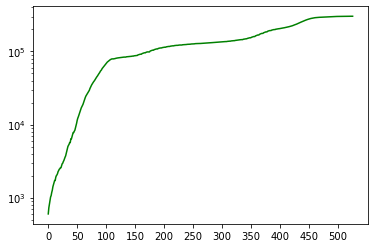

In [39]:
#OMAN
new = df_oman['Cumulative_cases'][100:]
new = pd.DataFrame(new)
new = new.reset_index(drop = True)
new['Cumulative_cases'].plot(label = 'Oman Cases', color = 'green')
plt.xticks(np.arange(0, 525, 50))
plt.yscale('log')
plt.show()

In [40]:
temp = []
i = 0
while i < 527:
    temp.append(i)
    i += 1
#print(temp)

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(temp,new['Cumulative_cases'])
print(slope, intercept, r_value, p_value, std_err)

574.5182505570274 -9787.08547524584 0.9755388289238164 0.0 5.650163627836958


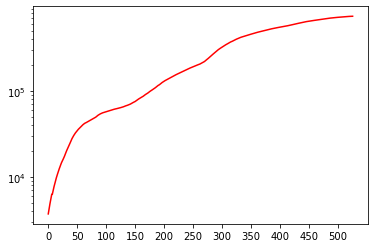

In [41]:
# UAE
new = df_uae['Cumulative_cases'][100:]
new = pd.DataFrame(new)
new = new.reset_index(drop = True)
new['Cumulative_cases'].plot(label = 'UAE Cases', color = 'red')
plt.xticks(np.arange(0, 525, 50))
plt.yscale('log')
plt.show()

In [42]:
temp = []
i = 0
while i < 527:
    temp.append(i)
    i += 1
#print(temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(temp,new['Cumulative_cases'])
print(slope, intercept, r_value, p_value, std_err)

1581.1303629253628 -114304.55679661897 0.973926394785631 0.0 16.07414608152275


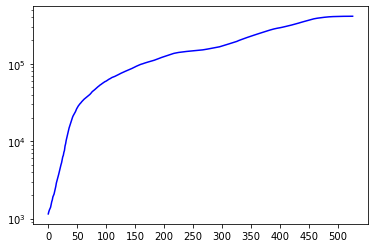

In [43]:
#Kuwait
new = df_kwt['Cumulative_cases'][100:]
new = pd.DataFrame(new)
new = new.reset_index(drop = True)
new['Cumulative_cases'].plot(label = 'Kuwait Cases', color = 'blue')
plt.xticks(np.arange(0, 525, 50))
plt.yscale('log')
plt.show()

In [44]:
temp = []
i = 0
while i < 527:
    temp.append(i)
    i += 1
#print(temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(temp,new['Cumulative_cases'])
print(slope, intercept, r_value, p_value, std_err)

820.2294587766978 -33321.27744954286 0.9822795253933815 0.0 6.830315142065541
